In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima
import datetime as dt

In [2]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_NonCovid.csv",index_col=0)

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df2 = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_cleaned.csv",index_col=0)

In [4]:
df2.Month = pd.to_datetime(df2['Month'], format='%Y-%m')

In [5]:
#df = df.reset_index(drop=True)

In [6]:
df.head()

Crime_ID    Month  \
0  9500972e2e3c87dc23b65885dd61085ee8a39329c03792...  2017-01   
1  4c3b7072a3bfcf441b1036e67fd642cf1e42fdccf16af1...  2017-01   
2  8e6ae250f68623b82068cd3c79b64b05a559f6d9c9393c...  2017-01   
3  0f5c81322cd60d96ef8877d94eb37e98cad395d1773efc...  2017-01   
4  b46b395f390b0dc9112686c30d0939f0ded0de42877df7...  2017-01   

                      Reported_by                    Crime_type  \
0  Avon and Somerset Constabulary                Theft offences   
1  Avon and Somerset Constabulary     Criminal damage and arson   
2  Avon and Somerset Constabulary     Criminal damage and arson   
3  Avon and Somerset Constabulary  Violence and sexual offences   
4  Avon and Somerset Constabulary  Violence and sexual offences   

            Outcome_type      Region  Year  
0          Other Outcome  South West  2017  
1  No suspect identified  South West  2017  
2  No suspect identified  South West  2017  
3  No suspect identified  South West  2017  
4  No suspect identified  South West  2017

In [7]:
df['Crime_type'].value_counts()

Violence and sexual offences    4009138
Theft offences                  3592460
Criminal damage and arson       1406043
Public order offences            965265
Drug offences                    367286
Name: Crime_type, dtype: int64

In [8]:
df.Month = pd.to_datetime(df['Month'], format='%Y-%m')

In [9]:
grouped = df.groupby(['Month','Crime_type'])['Crime_ID'].count()
grouped = grouped.reset_index().rename(columns={'Crime_ID':'Count'})

In [10]:
grouped2 = df2.groupby(['Month','Crime_type'])['Crime_ID'].count()
grouped2 = grouped2.reset_index().rename(columns={'Crime_ID':'Count'})

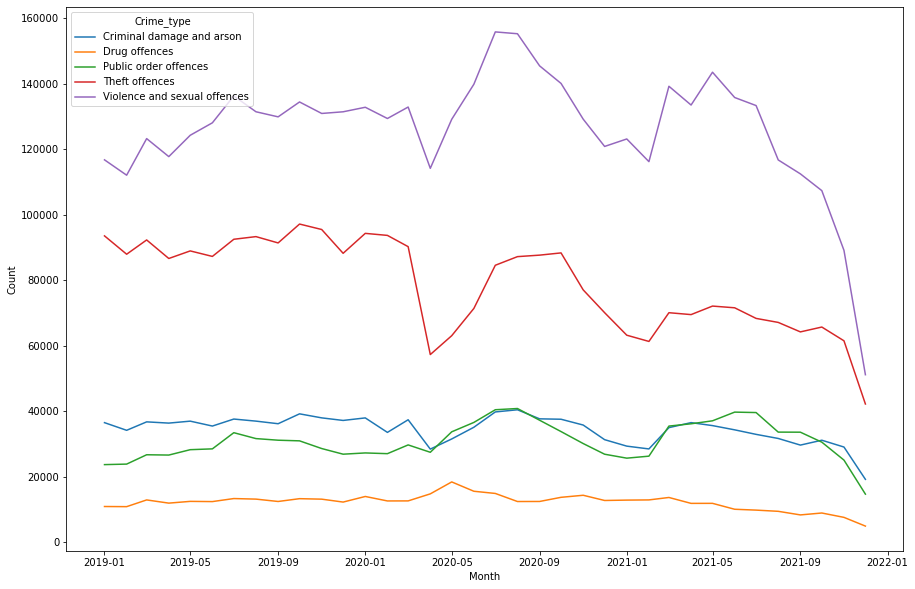

In [11]:
plt.figure(figsize=(15,10))
sns.lineplot(data=grouped2,x='Month',y='Count', hue='Crime_type')
plt.show()

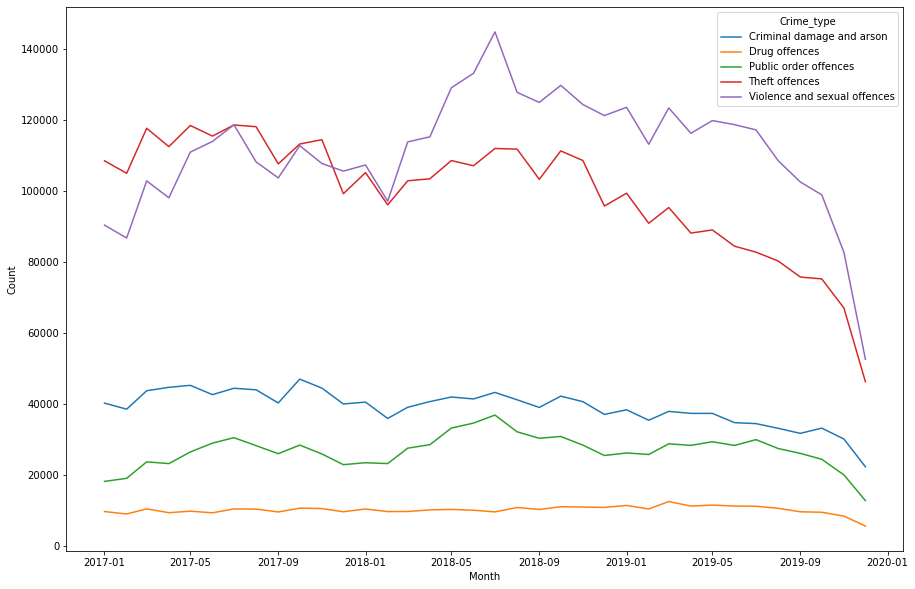

In [12]:
plt.figure(figsize=(15,10))
sns.lineplot(data=grouped,x='Month',y='Count', hue='Crime_type')
plt.show()

In [13]:
grouped

Month                    Crime_type   Count
0   2017-01-01     Criminal damage and arson   40283
1   2017-01-01                 Drug offences    9726
2   2017-01-01         Public order offences   18221
3   2017-01-01                Theft offences  108601
4   2017-01-01  Violence and sexual offences   90461
..         ...                           ...     ...
175 2019-12-01     Criminal damage and arson   22338
176 2019-12-01                 Drug offences    5628
177 2019-12-01         Public order offences   12818
178 2019-12-01                Theft offences   46325
179 2019-12-01  Violence and sexual offences   52665

[180 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

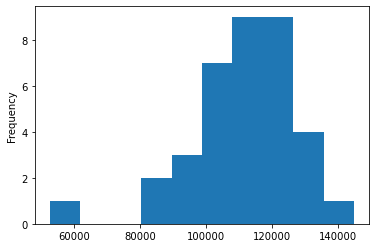

In [14]:
vio = grouped[grouped['Crime_type']=='Violence and sexual offences']
vio = vio.set_index('Month')
vio = vio['Count']
vio_cut = vio[0:12]
vio.plot.hist()

In [15]:
vio2 = grouped2[grouped2['Crime_type']=='Violence and sexual offences']
vio2 = vio2.set_index('Month')
vio2 = vio2['Count']

In [16]:
vio[-1] = 131435
vio[-2] = 130926
vio[-3] = 134433

In [17]:
vio[-12:] = vio2[:12]
vio[-12:]

Month
2019-01-01    116769
2019-02-01    112084
2019-03-01    123253
2019-04-01    117756
2019-05-01    124268
2019-06-01    128073
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
Name: Count, dtype: int64

In [18]:
vio

Month
2017-01-01     90461
2017-02-01     86843
2017-03-01    102943
2017-04-01     98168
2017-05-01    111053
2017-06-01    114047
2017-07-01    118755
2017-08-01    108291
2017-09-01    103779
2017-10-01    112860
2017-11-01    107842
2017-12-01    105687
2018-01-01    107411
2018-02-01     97208
2018-03-01    113921
2018-04-01    115362
2018-05-01    129181
2018-06-01    133258
2018-07-01    144929
2018-08-01    127890
2018-09-01    125052
2018-10-01    129872
2018-11-01    124457
2018-12-01    121339
2019-01-01    116769
2019-02-01    112084
2019-03-01    123253
2019-04-01    117756
2019-05-01    124268
2019-06-01    128073
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
Name: Count, dtype: int64

In [19]:
from statsmodels.tsa.stattools import adfuller
adfuller(vio)[1]

0.1670978086848064

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

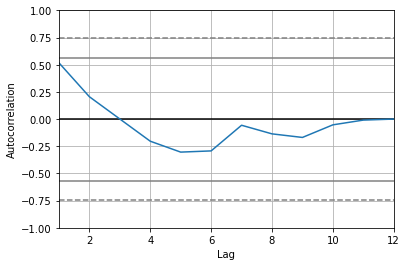

In [20]:
autocorrelation_plot(vio_cut)

In [21]:
train = vio
train

Month
2017-01-01     90461
2017-02-01     86843
2017-03-01    102943
2017-04-01     98168
2017-05-01    111053
2017-06-01    114047
2017-07-01    118755
2017-08-01    108291
2017-09-01    103779
2017-10-01    112860
2017-11-01    107842
2017-12-01    105687
2018-01-01    107411
2018-02-01     97208
2018-03-01    113921
2018-04-01    115362
2018-05-01    129181
2018-06-01    133258
2018-07-01    144929
2018-08-01    127890
2018-09-01    125052
2018-10-01    129872
2018-11-01    124457
2018-12-01    121339
2019-01-01    116769
2019-02-01    112084
2019-03-01    123253
2019-04-01    117756
2019-05-01    124268
2019-06-01    128073
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
Name: Count, dtype: int64

In [22]:
stepwise_fit = auto_arima(train,trace=True,suppress_warnings=True,d=1)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=731.805, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=731.162, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=731.350, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=731.961, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=729.945, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=728.905, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=730.041, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=730.445, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=730.028, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=728.723, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=730.410, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=732.002, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=727.149, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=730.711, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=729.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -360.574
Date:                Tue, 28 Jun 2022   AIC                            727.149
Time:                        15:55:03   BIC                            731.815
Sample:                             0   HQIC                           728.759
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0575      0.123     -0.467      0.640      -0.299       0.184
ar.L2          0.1778      0.146      1.214      0.225      -0.109       0.465
sigma2       5.38e+07   6.49e-10   8.29e+16      0.000    5.38e+07    5.38e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.44   Prob(JB):                         0.90
Heteroskedasticity (H):               0.81   Skew:                            -0.07
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+32. Standard errors may be unstable.
"""

In [23]:
from statsmodels.tsa.arima.model import ARIMA
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)
model = ARIMA(train, order=(2,1,0),seasonal_order=(1,1,1,12))
model_fit = model.fit()
yhat = model_fit.predict(len(train), len(train)+23) 
print(yhat)


2020-01-01    133372.518257
2020-02-01    129119.000232
2020-03-01    140590.189352
2020-04-01    134328.227162
2020-05-01    140927.534035
2020-06-01    144785.056824
2020-07-01    152701.757805
2020-08-01    148339.623571
2020-09-01    146610.477072
2020-10-01    151653.479460
2020-11-01    148058.698235
2020-12-01    148480.974736
2021-01-01    144879.786757
2021-02-01    140256.506921
2021-03-01    151460.925841
2021-04-01    145875.826697
2021-05-01    152397.886405
2021-06-01    156208.937430
2021-07-01    164380.723554
2021-08-01    159600.200696
2021-09-01    158026.907500
2021-10-01    162627.510954
2021-11-01    159110.397999
2021-12-01    159609.406900
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [24]:
forecast = model_fit.get_prediction(1)
yhat_conf_int = forecast.conf_int(alpha=0.05)
yhat_conf_int

lower Count    upper Count
2017-02-01   86288.847453  106494.578267
2017-03-01   76416.712476   96620.739853
2017-04-01   93939.824402  114143.851486
2017-05-01   87726.539317  107930.566401
2017-06-01  101832.359855  122036.386939
2017-07-01  104137.318444  124341.345528
2017-08-01  108970.756202  129174.783286
2017-09-01   97472.425569  117676.452653
2017-10-01   93379.868678  113583.895762
2017-11-01  103394.589979  123598.616801
2017-12-01   97650.365061  117854.305323
2018-01-01  186282.428152  206486.171484
2018-02-01   87696.021470  107497.779299
2018-03-01  103727.889815  123527.701178
2018-04-01   99049.851775  118849.662659
2018-05-01  119345.728556  139145.539441
2018-06-01  122424.109239  142223.920124
2018-07-01  128331.457429  148131.268314
2018-08-01  124599.947105  144399.757990
2018-09-01  112845.696601  132645.507486
2018-10-01  124754.262092  144554.072976
2018-11-01  114398.816374  134198.627028
2018-12-01  112050.244260  131849.978988
2019-01-01  106077.376674  125863.181763
2019-02-01   96559.168689  116342.321714
2019-03-01  118702.266871  138485.407359
2019-04-01  114915.581103  134698.721589
2019-05-01  120700.776616  140483.917102
2019-06-01  117907.458375  137690.598861
2019-07-01  129979.420805  149762.561291
2019-08-01  109204.480619  128987.621104
2019-09-01  119827.073198  139610.213684
2019-10-01  124327.351555  144110.492041
2019-11-01  119335.567832  139118.708118
2019-12-01  118314.606206  138097.680597

In [25]:
vio2[:12]

Month
2019-01-01    116769
2019-02-01    112084
2019-03-01    123253
2019-04-01    117756
2019-05-01    124268
2019-06-01    128073
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
Name: Count, dtype: int64

In [26]:
vio3 = pd.concat([vio,vio2[12:]])


In [27]:
vio3

2017-01-01     90461
2017-02-01     86843
2017-03-01    102943
2017-04-01     98168
2017-05-01    111053
2017-06-01    114047
2017-07-01    118755
2017-08-01    108291
2017-09-01    103779
2017-10-01    112860
2017-11-01    107842
2017-12-01    105687
2018-01-01    107411
2018-02-01     97208
2018-03-01    113921
2018-04-01    115362
2018-05-01    129181
2018-06-01    133258
2018-07-01    144929
2018-08-01    127890
2018-09-01    125052
2018-10-01    129872
2018-11-01    124457
2018-12-01    121339
2019-01-01    116769
2019-02-01    112084
2019-03-01    123253
2019-04-01    117756
2019-05-01    124268
2019-06-01    128073
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
2020-01-01    132816
2020-02-01    129386
2020-03-01    132884
2020-04-01    114177
2020-05-01    129148
2020-06-01    139847
2020-07-01    155815
2020-08-01    155256
2020-09-01    145452
2020-10-01    140091
2020-11-01    129192
2020-12-01   

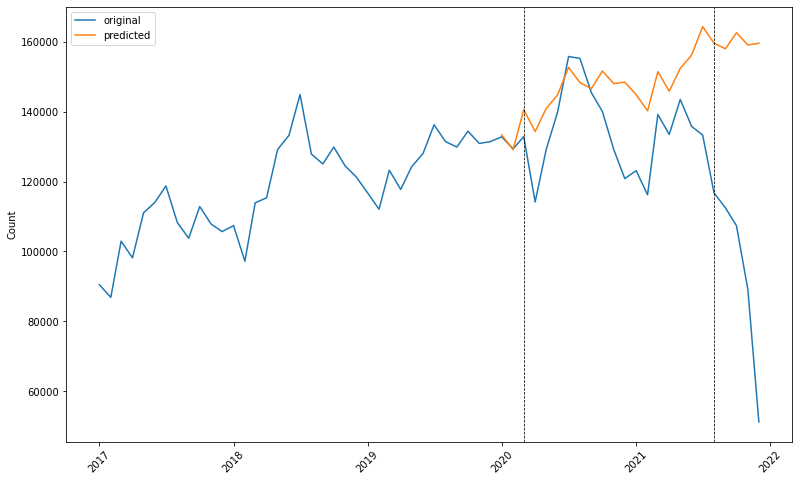

In [44]:
plt.figure(figsize=(13,8))
sns.lineplot(data=vio3,label='original')
sns.lineplot(data=yhat,label='predicted')
plt.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
plt.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
#sns.lineplot(data=yhat_conf_int,label='blah')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [29]:
vio_normed = vio/67220000*10000
yhat_normed = yhat/67220000*10000

(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.,
        18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

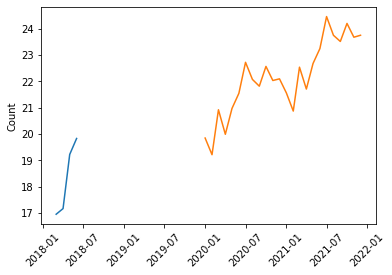

In [30]:
sns.lineplot(data=vio_normed[14:18])
sns.lineplot(data=yhat_normed)
plt.xticks(rotation = 45)

In [31]:
model = ARIMA(rolling_mean, order=(0,1,0))
model_fit = model.fit()
yhat2 = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) 

NameError: name 'rolling_mean' is not defined